# **Libraries**

In [1]:
!pip install -U -q PyDrive

In [44]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import zipfile
import shutil

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import plotly.express as px
import pandas as pd
import seaborn as sb

# **Data Imports**
[Corn Dataset](https://www.kaggle.com/datasets/soumiknafiul/plantvillage-dataset-labeled?select=PlantVillage+Dataset+%28Labeled%29)

The dataset is from kaggle "PlantVillage" for project purpose we modified the dataset, just only have "Corn/Maize" class.

Link for dataset in Google Drive
https://drive.google.com/file/d/1Rz5WPnNgvDLXBYyk3WZtGCSYcDhtDCdt/view?usp=sharing

## **Google Drive Authentication**

In [14]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [15]:
link = 'https://drive.google.com/file/d/1Rz5WPnNgvDLXBYyk3WZtGCSYcDhtDCdt/view?usp=sharing'

In [16]:
id = link.split('d/')[1].split('/view?')[0]
print (id)

1Rz5WPnNgvDLXBYyk3WZtGCSYcDhtDCdt


## **Download and Unzip Files**

In [17]:
drive_file = drive.CreateFile({'id':id})  
drive_file.GetContentFile('PlantVillage_Corn.zip')

In [19]:
file_zip = 'PlantVillage_Corn.zip'
zip_ref = zipfile.ZipFile(file_zip, 'r')
zip_ref.extractall('content/PlantVillage_Corn.zip')
zip_ref.close()

print(os.listdir('content/PlantVillage_Corn.zip/PlantVillage_Corn'))

['Northern_Leaf_Blight', 'Cercospora_Leaf_Spot Gray_Leaf_Spot', 'Common_Rust', 'Healthy']


# **Exploratory Data Analysis**

In [20]:
cornleaf_classname = ['Northern_Leaf_Blight'
                      'Cercospora_Leaf_Spot Gray_Leaf_Spot'
                      'Common_Rust'
                      'Healthy']
src_dir = ('content/PlantVillage_Corn.zip/PlantVillage_Corn')
root_dir = '/tmp/Data'

In [21]:
listdir_image = os.listdir('content/PlantVillage_Corn.zip/PlantVillage_Corn')
print(listdir_image)

['Northern_Leaf_Blight', 'Cercospora_Leaf_Spot Gray_Leaf_Spot', 'Common_Rust', 'Healthy']


In [22]:
image_dir ='content/PlantVillage_Corn.zip/PlantVillage_Corn'

for  x in listdir_image:
  z = os.path.join(image_dir,x)
  print(x ," : ",len(os.listdir(z)),"Images")

Northern_Leaf_Blight  :  978 Images
Cercospora_Leaf_Spot Gray_Leaf_Spot  :  513 Images
Common_Rust  :  1186 Images
Healthy  :  1162 Images


In [28]:
leafdissease = ['Northern_Leaf_Blight', 'Cercospora_Leaf_Spot Gray_Leaf_Spot', 'Common_Rust', 'Healthy']

for x in listdir_image:
  if x not in leafdissease:
    path = os.path.join(image_dir,x)
    if os.path.isfile(path):
      os.remove(path)
    elif os.path.isdir(path):
      shutil.rmtree(path)
    else:
      print('Not found')

listdir_image = os.listdir(image_dir)
listdir_image

['Northern_Leaf_Blight',
 'Cercospora_Leaf_Spot Gray_Leaf_Spot',
 'Common_Rust',
 'Healthy']

Northern_Leaf_Blight
Cercospora_Leaf_Spot Gray_Leaf_Spot
Common_Rust
Healthy


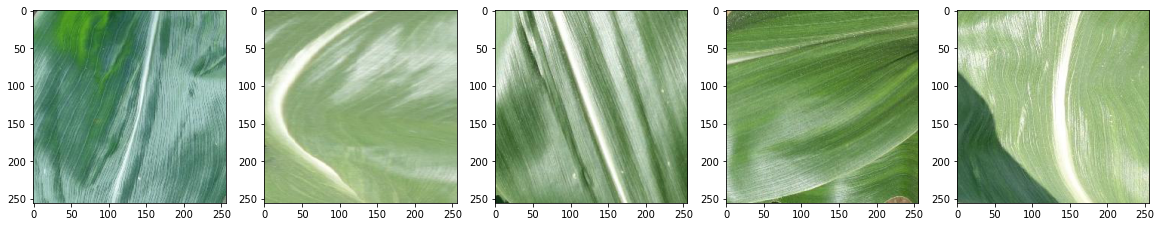

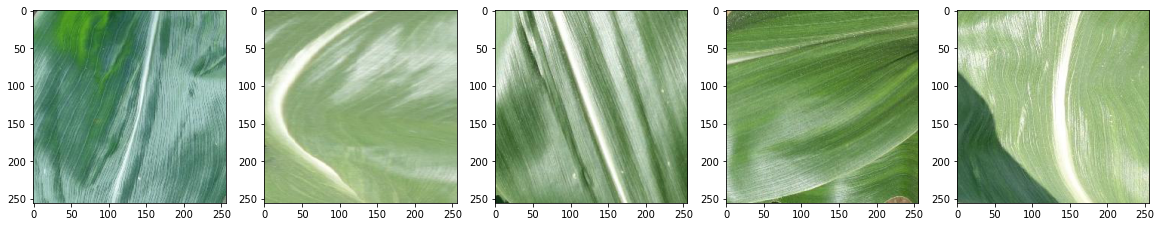

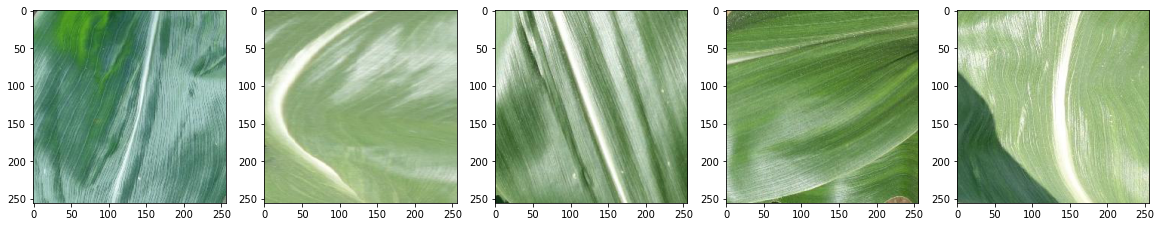

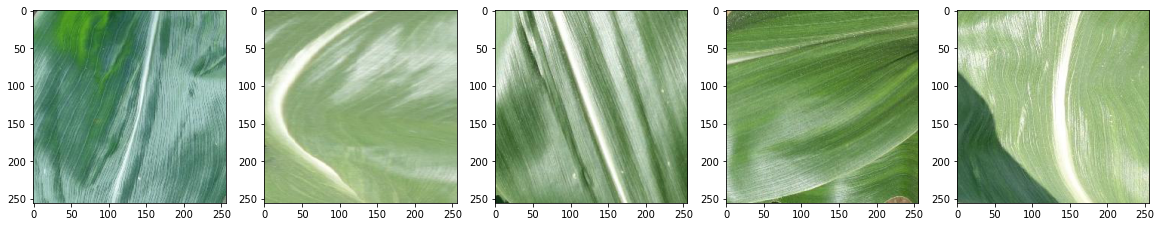

In [29]:
for x in listdir_image:
  print(x)
  z = os.path.join(image_dir,y)
  img_cls = os.listdir(z)
  plt.figure(figsize = (20, 4))
  for i, path_img in enumerate(img_cls[:5]):
    plotsub = plt.subplot(1, 5, i+1)
    img = mpimg.imread(os.path.join(z, path_img))
    plt.imshow(img)
  plt.show